# Day_071

### 練習時間

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


### 資料準備

In [2]:
# 取得Keras Dataset
(x_img_train, y_label_train), (x_img_test, y_label_test)= cifar10.load_data()

In [3]:
# 確認 CIFAR10 Dataset 資料維度
print("train data:",'images: ',x_img_train.shape, "labels:",y_label_train.shape) 
print("test  data:",'images: ',x_img_test.shape , "labels:",y_label_test.shape) 

train data: images:  (50000, 32, 32, 3) labels: (50000, 1)
test  data: images:  (10000, 32, 32, 3) labels: (10000, 1)


In [4]:
# 資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
# 針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

### 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
# 卷積層 1 與池化層 1
model.add(Conv2D(filters = 32, 
                 kernel_size = (3, 3),
                 input_shape = (32, 32, 3), 
                 activation = 'relu', 
                 padding = 'same'))

In [9]:
model.add(Dropout(rate = 0.25))

In [10]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [11]:
#卷積層 2 與池化層 2
model.add(Conv2D(filters = 64, 
                 kernel_size = (3, 3), 
                 activation = 'relu',
                 padding = 'same'))

In [12]:
model.add(Dropout(rate = 0.25))

In [13]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [14]:
# 建立神經網路
# 平坦層
model.add(Flatten())
model.add(Dropout(rate = 0.25))

# 隱藏層
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(rate = 0.25))

# 輸出層
model.add(Dense(10, activation = 'softmax'))

In [15]:
# 檢查model 的 STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [16]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


### 訓練模型

### 練習時間
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [19]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split = 0.2,
                          epochs = 10, batch_size = 16, verbose = 1)     

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 281s 7ms/step - loss: 1.8123 - acc: 0.3426 - val_loss: 1.6094 - val_acc: 0.4602
Epoch 2/10
40000/40000 [==============================] - 287s 7ms/step - loss: 1.4472 - acc: 0.4798 - val_loss: 1.3804 - val_acc: 0.5402
Epoch 3/10
40000/40000 [==============================] - 284s 7ms/step - loss: 1.2960 - acc: 0.5384 - val_loss: 1.3061 - val_acc: 0.5828
Epoch 4/10
40000/40000 [==============================] - 284s 7ms/step - loss: 1.1888 - acc: 0.5801 - val_loss: 1.2158 - val_acc: 0.6135
Epoch 5/10
40000/40000 [==============================] - 288s 7ms/step - loss: 1.1040 - acc: 0.6096 - val_loss: 1.1509 - val_acc: 0.6346
Epoch 6/10
40000/40000 [==============================] - 270s 7ms/step - loss: 1.0341 - acc: 0.6328 - val_loss: 1.1072 - val_acc: 0.6289
Epoch 7/10
40000/40000 [==============================] - 272s 7ms/step - loss: 0.9713 - acc: 0.6560 - val_loss: 1.0527 - 

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.show()

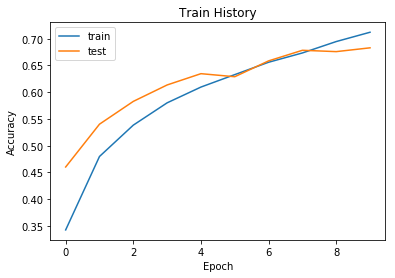

In [21]:
show_train_history('acc', 'val_acc')

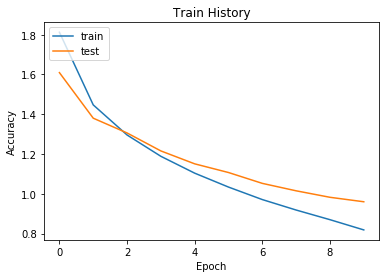

In [22]:
show_train_history('loss','val_loss')

In [23]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy'])

In [24]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split = 0.2,
                          epochs = 10, batch_size = 16, verbose = 1)     

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 287s 7ms/step - loss: 0.0352 - acc: 0.7471 - val_loss: 0.0421 - val_acc: 0.7067
Epoch 2/10
40000/40000 [==============================] - 290s 7ms/step - loss: 0.0344 - acc: 0.7545 - val_loss: 0.0418 - val_acc: 0.7088
Epoch 3/10
40000/40000 [==============================] - 272s 7ms/step - loss: 0.0341 - acc: 0.7572 - val_loss: 0.0414 - val_acc: 0.7107
Epoch 4/10
40000/40000 [==============================] - 268s 7ms/step - loss: 0.0335 - acc: 0.7614 - val_loss: 0.0412 - val_acc: 0.7130
Epoch 5/10
40000/40000 [==============================] - 263s 7ms/step - loss: 0.0332 - acc: 0.7641 - val_loss: 0.0408 - val_acc: 0.7163
Epoch 6/10
40000/40000 [==============================] - 275s 7ms/step - loss: 0.0329 - acc: 0.7660 - val_loss: 0.0409 - val_acc: 0.7133
Epoch 7/10
40000/40000 [==============================] - 281s 7ms/step - loss: 0.0326 - acc: 0.7672 - val_loss: 0.0407 - 

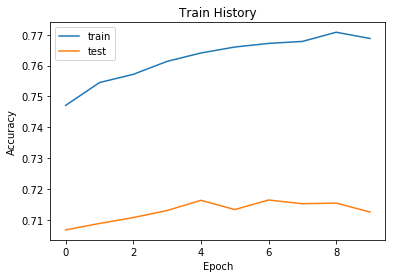

In [25]:
show_train_history('acc', 'val_acc')

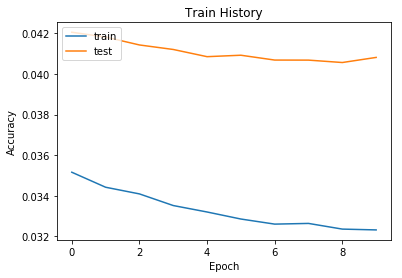

In [26]:
show_train_history('loss', 'val_loss')

In [27]:
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [28]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split = 0.2,
                          epochs = 10, batch_size = 16, verbose = 1)     

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 290s 7ms/step - loss: 0.1112 - acc: 0.9565 - val_loss: 0.1389 - val_acc: 0.9466
Epoch 2/10
40000/40000 [==============================] - 303s 8ms/step - loss: 0.1104 - acc: 0.9567 - val_loss: 0.1381 - val_acc: 0.9471
Epoch 3/10
40000/40000 [==============================] - 313s 8ms/step - loss: 0.1087 - acc: 0.9576 - val_loss: 0.1392 - val_acc: 0.9465
Epoch 4/10
40000/40000 [==============================] - 293s 7ms/step - loss: 0.1073 - acc: 0.9580 - val_loss: 0.1367 - val_acc: 0.9476
Epoch 5/10
40000/40000 [==============================] - 279s 7ms/step - loss: 0.1059 - acc: 0.9584 - val_loss: 0.1361 - val_acc: 0.9480
Epoch 6/10
40000/40000 [==============================] - 292s 7ms/step - loss: 0.1041 - acc: 0.9596 - val_loss: 0.1358 - val_acc: 0.9478
Epoch 7/10
40000/40000 [==============================] - 297s 7ms/step - loss: 0.1030 - acc: 0.9601 - val_loss: 0.1346 - 

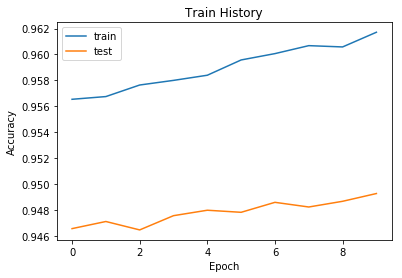

In [29]:
show_train_history('acc', 'val_acc')

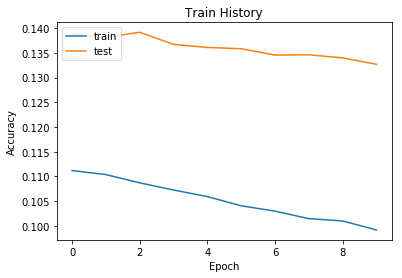

In [30]:
show_train_history('loss', 'val_loss')

#### 使用 binary_crossentropy 比使用 categorical_crossentropy 和 MSE 的準確率都來的高